# Restaurant in Chennai

Importing all the packages required

In [6]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Getting total webpage Html page to text file

In [7]:
source = requests.get('http://www.chennaiiq.com/chennai/pincode_by_postal.asp').text

soup = BeautifulSoup(source, 'lxml')

Seperating the required table data from the total text file.

In [8]:
table = soup.find('table')

In [9]:
finaltable=table.find('table', class_='TBox')

Creating an empty data frame.

In [10]:
# define the dataframe columns
column_names = ['Postal_code','Borough', 'Neighborhood'] 

# instantiate the dataframe
data = pd.DataFrame(columns=column_names)

In [11]:
first = False
for row in finaltable.find_all('tr', class_='tab'):
    borough = 'chennai'
    count = 1
    Flag = False
    if first == False:
        first = True
        continue
    for eachdata in row.find_all('td'):
        if eachdata:
            Flag = True    
            if count==2:
                neigh = eachdata.text
                neigh=neigh.strip()
            else:
                pc = eachdata.text
                count=1
            count=count+1
    if Flag:
        data = data.append({'Postal_code':pc,'Borough': borough,
                                          'Neighborhood': neigh.strip()},ignore_index=True)

In [12]:
data.head()

,Postal_code,Borough,Neighborhood
0,600001,chennai,Angappanaicken Street
1,600001,chennai,Wal Tax Road
2,600001,chennai,Seven Wells
3,600001,chennai,Sembier Street
4,600001,chennai,Monegar Choultry


In [13]:
data = data.groupby(['Postal_code','Borough'],as_index=False, sort = False).agg({'Neighborhood': lambda x: ','.join(x) })

In [14]:
data.head()

,Postal_code,Borough,Neighborhood
0,600001,chennai,"Angappanaicken Street,Wal Tax Road,Seven Wells..."
1,600002,chennai,"Pudupet,Madras Electricity System,Government E..."
2,600003,chennai,"Ripon Buildings,Park Town,Madras Medical Colle..."
3,600004,chennai,"Santhome,Royapettah High Road,Police Head Quar..."
4,600005,chennai,"Tiruvellikeni,Parthasarathy Koil,Madras Presid..."


In [15]:
data.drop(data[data['Neighborhood'] == 'Taramani'].index, inplace=True)

In [58]:
# define the dataframe columns
column_names = ['Postal_code', 'Latitude', 'Longitude'] 

# instantiate the dataframe
locations = pd.DataFrame(columns=column_names)

In [59]:
!pip install pgeocode
import pgeocode

In [60]:
for index, row in data.iterrows():
    address = row['Postal_code']
    nomi = pgeocode.Nominatim('IN')
    la = nomi.query_postal_code(int(address))
    latitude1 = la.latitude
    longitude1 = la.longitude
    if np.isnan(latitude1) and np.isnan(longitude1):
        longitude = longitude
        latitude = latitude
    else:
        longitude = longitude1
        latitude = latitude1
    print(latitude, longitude)
    locations = locations.append({'Postal_code': address,'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)


13.093 80.28281666666669
13.0744 80.2714
13.0754 80.2737
13.0754 80.2737
13.0594 80.2778
13.0754 80.2737
13.0847 80.2675
13.0717 80.2556
13.0754 80.2737
13.08 80.2408
13.1103 80.2425
13.0647 80.0475
13.1141 80.2947
13.0506 80.2642
13.1096 80.2146
12.9846 80.1747
13.1096 80.2146
13.0433 80.2528
13.1582 80.3018
12.9967 80.2603
13.121 80.285
13.0484 80.2473
13.0484 80.2473
13.0481 80.2214
13.0484 80.2473
13.0511 80.2125
13.0511 80.2125
13.025 80.2575
13.025 80.2575
13.0739 80.2244
13.07 80.2408
13.0659 80.2365
13.0389 80.2258
13.0606 80.2344
13.0269 80.2406
13.0659 80.2365
13.0659 80.2365
13.0659 80.2365
13.1111 80.2647
12.8819 80.0885
13.0647 80.2561
13.0647 80.2523
12.968 80.1502
12.9477 80.0591125
12.8819 80.0885
12.8819 80.0885
12.8819 80.0885
12.8924 80.072425
13.1228 80.1703
13.2431 79.94886666666667
13.1501 80.242
12.9674 79.58492222222223
12.9571 79.97579999999998
13.2431 80.07584
13.1547 80.06939999999999
13.0384 79.87262
13.0252 79.8562
13.0252 79.8562
13.0252 79.8562
13.1269 80

In [61]:
locations

,Postal_code,Latitude,Longitude
0,600001,13.0930,80.282817
1,600002,13.0744,80.271400
2,600003,13.0754,80.273700
3,600004,13.0754,80.273700
4,600005,13.0594,80.277800
5,600006,13.0754,80.273700
6,600007,13.0847,80.267500
7,600008,13.0717,80.255600
8,600009,13.0754,80.273700
9,600010,13.0800,80.240800


In [63]:
finaldata = pd.merge(data,locations, on = 'Postal_code')
finaldata.head(10)

,Postal_code,Borough,Neighborhood,Latitude,Longitude
0,600001,chennai,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817
1,600002,chennai,"Pudupet,Madras Electricity System,Government E...",13.0744,80.271400
2,600003,chennai,"Ripon Buildings,Park Town,Madras Medical Colle...",13.0754,80.273700
3,600004,chennai,"Santhome,Royapettah High Road,Police Head Quar...",13.0754,80.273700
4,600005,chennai,"Tiruvellikeni,Parthasarathy Koil,Madras Presid...",13.0594,80.277800
5,600006,chennai,"Teynampet West,Shastri Bhavan,Old College Buil...",13.0754,80.273700
6,600007,chennai,Vepery,13.0847,80.267500
7,600008,chennai,"Egmore,Egmore High Road",13.0717,80.255600
8,600009,chennai,Fort St George,13.0754,80.273700
9,600010,chennai,"New Avadi Road,Medavakkam Tank Road,Kilpauk We...",13.0800,80.240800


In [64]:
# The code was removed by Watson Studio for sharing.

In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
venues = getNearbyVenues(names=finaldata['Neighborhood'],
                                   latitudes=finaldata['Latitude'],
                                   longitudes=finaldata['Longitude']
                                  )
print(venues.shape)
venues.head()

Angappanaicken Street,Wal Tax Road,Seven Wells,Sembier Street,Monegar Choultry,Mint Buildings,Muthialpet,Mannady,M P T Admn Office,Madras Gpo,Kothwal Market,Flower Bazar,Govt Stanely Hospital
Pudupet,Madras Electricity System,Government Estate,Chintadripeta,Anna Road H O,Annaroad Sourth
Ripon Buildings,Park Town,Madras Medical College,Dr Ambedkarnagar,Edapalayam,Central Station
Santhome,Royapettah High Road,Police Head Quarters,Nochikuppam Colony,Ms Vivekanands College,Mylopore,Mandavalli,Luz Church Road
Tiruvellikeni,Parthasarathy Koil,Madras Presidency College,Madras University,Krishnampet,Chepauk
Teynampet West,Shastri Bhavan,Old College Buildings,Greams Road,Cathedral
Vepery
Egmore,Egmore High Road
Fort St George
New Avadi Road,Medavakkam Tank Road,Kilpauk West,Kilpauk,Kilpauk Garden Colony,Kilpauk Medical College
Sembiam,Perambur,Perambur North,Chinnaiah Mudali Colony
Venkatesapuram,Syrahans Road,Pulianthope,Perambur Barracks,Perambur High Road,Kosapet,Decoster Road
Rayapuram Madr

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,Kakada Ramprasad,13.090415,80.279111,Indian Restaurant
1,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,Gujarati Mandal,13.089637,80.285770,Indian Restaurant
2,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,Reliance Fresh,13.094055,80.279582,Department Store
3,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,Broadway,13.090351,80.285716,Bus Station
4,"Pudupet,Madras Electricity System,Government E...",13.0744,80.271400,Chintatri Pet MRTS,13.073010,80.274172,General Travel


In [67]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Abiramapuram,Teynampet,Teynampet South,Ms Accountant General,Eldams Road,Chamiers Road",20,20,20,20,20,20
Alwar Tirunagar,7,7,7,7,7,7
Aminijikarai,23,23,23,23,23,23
Anakaputhur,2,2,2,2,2,2
"Angappanaicken Street,Wal Tax Road,Seven Wells,Sembier Street,Monegar Choultry,Mint Buildings,Muthialpet,Mannady,M P T Admn Office,Madras Gpo,Kothwal Market,Flower Bazar,Govt Stanely Hospital",4,4,4,4,4,4
Annanagar,2,2,2,2,2,2
Annanagar East,5,5,5,5,5,5
Annanagar Western Extn,5,5,5,5,5,5
Ashok Nagar,6,6,6,6,6,6


In [68]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 115 uniques categories.


In [69]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot =onehot[fixed_columns]

onehot.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio,Zoo Exhibit
0,"Angappanaicken Street,Wal Tax Road,Seven Wells...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Angappanaicken Street,Wal Tax Road,Seven Wells...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Angappanaicken Street,Wal Tax Road,Seven Wells...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Angappanaicken Street,Wal Tax Road,Seven Wells...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Pudupet,Madras Electricity System,Government E...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,ATM,African Restaurant,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio,Zoo Exhibit
0,"Abiramapuram,Teynampet,Teynampet South,Ms Acco...",0.0,0.05000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.05000,0.000000,0.0
1,Alwar Tirunagar,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.285714,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.142857,0.00000,0.000000,0.0
2,Aminijikarai,0.0,0.00000,0.000000,0.000000,0.043478,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.043478,0.00000,0.043478,0.0
3,Anakaputhur,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
4,"Angappanaicken Street,Wal Tax Road,Seven Wells...",0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
5,Annanagar,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.5
6,Annanagar East,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
7,Annanagar Western Extn,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
8,Ashok Nagar,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.166667,0.000000,0.000000,...,0.166667,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
9,Broadway,0.0,0.00000,0.076923,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0


In [73]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abiramapuram,Teynampet,Teynampet South,Ms Accountant General,Eldams Road,Chamiers Road----
                venue  freq
0   Indian Restaurant  0.15
1              Lounge  0.15
2  Italian Restaurant  0.10
3               Hotel  0.05
4              Garden  0.05


----Alwar Tirunagar----
                           venue  freq
0                 Sandwich Place  0.29
1               Asian Restaurant  0.29
2  Vegetarian / Vegan Restaurant  0.14
3                         Bakery  0.14
4              Indian Restaurant  0.14


----Aminijikarai----
                venue  freq
0    Department Store  0.09
1         Pizza Place  0.09
2                 Spa  0.04
3  Italian Restaurant  0.04
4  Light Rail Station  0.04


----Anakaputhur----
                 venue  freq
0  Indie Movie Theater   0.5
1                 Park   0.5
2        Movie Theater   0.0
3           Playground   0.0
4             Platform   0.0


----Angappanaicken Street,Wal Tax Road,Seven Wells,Sembier Street,Monegar Choultry,Mint 

In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abiramapuram,Teynampet,Teynampet South,Ms Acco...",Indian Restaurant,Lounge,Italian Restaurant,Bowling Alley,Gym / Fitness Center,Ice Cream Shop,Garden,Juice Bar,Kerala Restaurant,Chinese Restaurant
1,Alwar Tirunagar,Asian Restaurant,Sandwich Place,Bakery,Indian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Food
2,Aminijikarai,Department Store,Pizza Place,Indian Restaurant,Snack Place,Ice Cream Shop,Yoga Studio,Italian Restaurant,Light Rail Station,Farmers Market,Dessert Shop
3,Anakaputhur,Indie Movie Theater,Park,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
4,"Angappanaicken Street,Wal Tax Road,Seven Wells...",Indian Restaurant,Department Store,Bus Station,Food,Daycare,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


## clustering

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

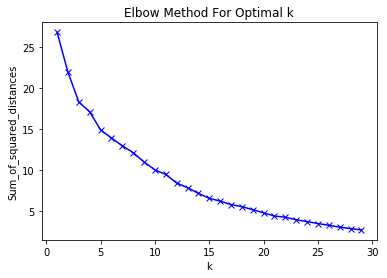

In [81]:
grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [82]:
kclusters = 10

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([7, 7, 7, 7, 1, 5, 4, 4, 7, 7], dtype=int32)

In [83]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = finaldata

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged =merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged.head() # check the last columns!


,Postal_code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,600001,chennai,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,1.0,Indian Restaurant,Department Store,Bus Station,Food,Daycare,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
1,600002,chennai,"Pudupet,Madras Electricity System,Government E...",13.0744,80.271400,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
2,600003,chennai,"Ripon Buildings,Park Town,Madras Medical Colle...",13.0754,80.273700,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
3,600004,chennai,"Santhome,Royapettah High Road,Police Head Quar...",13.0754,80.273700,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
4,600005,chennai,"Tiruvellikeni,Parthasarathy Koil,Madras Presid...",13.0594,80.277800,7.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Music Store,Light Rail Station,Cricket Ground,Amphitheater,Food Truck,Dessert Shop,Diner,Donut Shop


In [84]:
address = 'Chennai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
Chlatitude = location.latitude
Chlongitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(Chlatitude, Chlongitude))


The geograpical coordinate of Chennai are 13.0801721, 80.2838331.


In [104]:

# create map
map_clusters = folium.Map(location=[Chlatitude, Chlongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if np.isnan(cluster):
        cluster = 0
    else:
        cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(cluster)],
        fill=True,
        fill_color=rainbow[(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [105]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,chennai,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
2,chennai,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
3,chennai,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
5,chennai,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
8,chennai,0.0,General Travel,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [106]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,chennai,1.0,Indian Restaurant,Department Store,Bus Station,Food,Daycare,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
13,chennai,1.0,Indian Restaurant,Record Shop,Department Store,Smoke Shop,Cricket Ground,Currency Exchange,Daycare,Dessert Shop,Diner,Donut Shop
18,chennai,1.0,Indian Restaurant,Indie Movie Theater,Historic Site,Grocery Store,Clothing Store,Food,Department Store,Dessert Shop,Diner,Donut Shop
70,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
71,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
72,chennai,1.0,Indian Restaurant,Restaurant,Chettinad Restaurant,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
73,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
75,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
76,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
77,chennai,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market


In [107]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,chennai,2.0,Fast Food Restaurant,Zoo Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
108,chennai,2.0,Fast Food Restaurant,Zoo Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
109,chennai,2.0,Fast Food Restaurant,Zoo Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
110,chennai,2.0,Fast Food Restaurant,Zoo Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [108]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,chennai,3.0,Theme Park,Zoo Exhibit,Food Truck,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [109]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,chennai,4.0,Café,Hotel,Indian Restaurant,Lounge,Movie Theater,Nightclub,Cosmetics Shop,Concert Hall,Coffee Shop,Ice Cream Shop
22,chennai,4.0,Café,Hotel,Indian Restaurant,Lounge,Movie Theater,Nightclub,Cosmetics Shop,Concert Hall,Coffee Shop,Ice Cream Shop
24,chennai,4.0,Café,Hotel,Indian Restaurant,Lounge,Movie Theater,Nightclub,Cosmetics Shop,Concert Hall,Coffee Shop,Ice Cream Shop
34,chennai,4.0,Playground,Park,Café,Sports Bar,Fondue Restaurant,Daycare,Department Store,Dessert Shop,Diner,Donut Shop
41,chennai,4.0,Café,Indian Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Kebab Restaurant,Men's Store,Middle Eastern Restaurant,Department Store
80,chennai,4.0,Movie Theater,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
91,chennai,4.0,Café,Indian Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Kebab Restaurant,Men's Store,Middle Eastern Restaurant,Department Store
92,chennai,4.0,Café,Indian Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Kebab Restaurant,Men's Store,Middle Eastern Restaurant,Department Store
95,chennai,4.0,Indian Restaurant,Department Store,Park,Café,Fast Food Restaurant,Food,Dessert Shop,Diner,Donut Shop,Electronics Store
99,chennai,4.0,Café,Ice Cream Shop,Park,Market,Food,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store


In [110]:
merged.loc[merged['Cluster Labels'] == 5, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,chennai,5.0,Zoo Exhibit,Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
44,chennai,5.0,Zoo Exhibit,Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
45,chennai,5.0,Zoo Exhibit,Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
46,chennai,5.0,Zoo Exhibit,Exhibit,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [111]:
merged.loc[merged['Cluster Labels'] == 6, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,chennai,6.0,Bus Stop,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [112]:
merged.loc[merged['Cluster Labels'] == 7, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,chennai,7.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Music Store,Light Rail Station,Cricket Ground,Amphitheater,Food Truck,Dessert Shop,Diner,Donut Shop
6,chennai,7.0,Hotel,Asian Restaurant,Soccer Stadium,Fast Food Restaurant,Stadium,Food,Juice Bar,Vegetarian / Vegan Restaurant,Donut Shop,Diner
7,chennai,7.0,Indian Restaurant,Shopping Mall,Electronics Store,Fast Food Restaurant,Coffee Shop,Theater,Thai Restaurant,Sandwich Place,Seafood Restaurant,Museum
9,chennai,7.0,Ice Cream Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,South Indian Restaurant,Gym / Fitness Center,Juice Bar,Frozen Yogurt Shop,Fast Food Restaurant,Department Store,Daycare
10,chennai,7.0,Indian Restaurant,Restaurant,Bus Station,Bakery,Shopping Mall,Train Station,Vegetarian / Vegan Restaurant,Department Store,Dessert Shop,Diner
12,chennai,7.0,Pizza Place,Pier,Park,Dessert Shop,Bakery,Fondue Restaurant,Daycare,Department Store,Diner,Donut Shop
14,chennai,7.0,Food Truck,Light Rail Station,Smoke Shop,Fast Food Restaurant,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop
15,chennai,7.0,Train Station,Hotel,Metro Station,Restaurant,Fast Food Restaurant,Platform,Grocery Store,Exhibit,Cupcake Shop,Currency Exchange
16,chennai,7.0,Food Truck,Light Rail Station,Smoke Shop,Fast Food Restaurant,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop
17,chennai,7.0,Indian Restaurant,Lounge,Italian Restaurant,Bowling Alley,Gym / Fitness Center,Ice Cream Shop,Garden,Juice Bar,Kerala Restaurant,Chinese Restaurant


In [113]:
merged.loc[merged['Cluster Labels'] == 8, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,chennai,8.0,Market,Zoo Exhibit,Food Truck,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [114]:
merged.loc[merged['Cluster Labels'] == 9, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,chennai,9.0,Pizza Place,Zoo Exhibit,Food,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space


In [117]:
info = merged[merged['Cluster Labels']==1]

In [118]:
info

,Postal_code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,600001,chennai,"Angappanaicken Street,Wal Tax Road,Seven Wells...",13.0930,80.282817,1.0,Indian Restaurant,Department Store,Bus Station,Food,Daycare,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space
13,600014,chennai,"Triplicane South,Royapettah,Pudupakkam,Ligods ...",13.0506,80.264200,1.0,Indian Restaurant,Record Shop,Department Store,Smoke Shop,Cricket Ground,Currency Exchange,Daycare,Dessert Shop,Diner,Donut Shop
18,600019,chennai,"Wimconagar,Tiruvottiur Central,Tiruvottiyur,Ti...",13.1582,80.301800,1.0,Indian Restaurant,Indie Movie Theater,Historic Site,Grocery Store,Clothing Store,Food,Department Store,Dessert Shop,Diner,Donut Shop
70,600071,chennai,Kamarajanagar,12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
71,600072,chennai,"Thandarai,Pattabiram,Pattabiram East",12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
72,600073,chennai,Selaiyur,12.9194,80.095767,1.0,Indian Restaurant,Restaurant,Chettinad Restaurant,Cupcake Shop,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
73,600074,chennai,"Sithathur,Polichalur",12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
75,600076,chennai,Korattur R S,12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
76,600077,chennai,Tiruverkadu,12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
77,600078,chennai,"K K Nagar,Kalignar Karunanidhinagar,Kalinga Co...",12.9591,80.143600,1.0,Indian Restaurant,Clothing Store,Big Box Store,Shopping Mall,Fast Food Restaurant,Food,Pizza Place,Men's Store,General Travel,Farmers Market
